In [1]:
%matplotlib inline
import gudhi as gd
from gudhi import hera
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold


In [44]:
def createPD(n, kind):#kind = 1,2
    st1 = gd.SimplexTree()
    #n = 8

    for i in range(0,n+2):
        st1.insert([i],filtration = ((n+1-i)%(n+2)))
    
    st1.insert([0,1],filtration = 2*n*kind-1)

    for i in range(2,n+2):
        st1.insert([0,i],filtration = (4*n-2*i+1))
        st1.insert([1,i],filtration = (4*n-2*i+2))
        st1.insert([0,1,i],filtration = 4*n+(i-2))
    for splx in st1.get_filtration():
        print(splx)
    st1.compute_persistence()
    return st1.persistence_intervals_in_dimension(1)
    

([5], 0.0)
([4], 1.0)
([3], 2.0)
([2], 3.0)
([1], 4.0)
([0], 5.0)
([0, 1], 7.0)
([0, 5], 7.0)
([1, 5], 8.0)
([0, 4], 9.0)
([1, 4], 10.0)
([0, 3], 11.0)
([1, 3], 12.0)
([0, 2], 13.0)
([1, 2], 14.0)
([0, 1, 2], 16.0)
([0, 1, 3], 17.0)
([0, 1, 4], 18.0)
([0, 1, 5], 19.0)
([5], 0.0)
([4], 1.0)
([3], 2.0)
([2], 3.0)
([1], 4.0)
([0], 5.0)
([0, 5], 7.0)
([1, 5], 8.0)
([0, 4], 9.0)
([1, 4], 10.0)
([0, 3], 11.0)
([1, 3], 12.0)
([0, 2], 13.0)
([1, 2], 14.0)
([0, 1], 15.0)
([0, 1, 2], 16.0)
([0, 1, 3], 17.0)
([0, 1, 4], 18.0)
([0, 1, 5], 19.0)


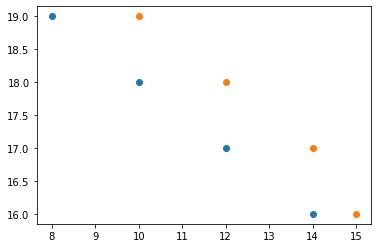

In [45]:
f,ax = plt.subplots()
PD1 = createPD(4,1)
PD2 = createPD(4,2)
ax.scatter(PD1[:,0], PD1[:,1])
ax.scatter(PD2[:,0], PD2[:,1])
plt.show()

In [52]:
PDs = []
for n in range(2,20):
    PDs.append(createPD(n,1))
    PDs.append(createPD(n,2))

([3], 0.0)
([2], 1.0)
([1], 2.0)
([0], 3.0)
([0, 1], 3.0)
([0, 3], 3.0)
([1, 3], 4.0)
([0, 2], 5.0)
([1, 2], 6.0)
([0, 1, 2], 8.0)
([0, 1, 3], 9.0)
([3], 0.0)
([2], 1.0)
([1], 2.0)
([0], 3.0)
([0, 3], 3.0)
([1, 3], 4.0)
([0, 2], 5.0)
([1, 2], 6.0)
([0, 1], 7.0)
([0, 1, 2], 8.0)
([0, 1, 3], 9.0)
([4], 0.0)
([3], 1.0)
([2], 2.0)
([1], 3.0)
([0], 4.0)
([0, 1], 5.0)
([0, 4], 5.0)
([1, 4], 6.0)
([0, 3], 7.0)
([1, 3], 8.0)
([0, 2], 9.0)
([1, 2], 10.0)
([0, 1, 2], 12.0)
([0, 1, 3], 13.0)
([0, 1, 4], 14.0)
([4], 0.0)
([3], 1.0)
([2], 2.0)
([1], 3.0)
([0], 4.0)
([0, 4], 5.0)
([1, 4], 6.0)
([0, 3], 7.0)
([1, 3], 8.0)
([0, 2], 9.0)
([1, 2], 10.0)
([0, 1], 11.0)
([0, 1, 2], 12.0)
([0, 1, 3], 13.0)
([0, 1, 4], 14.0)
([5], 0.0)
([4], 1.0)
([3], 2.0)
([2], 3.0)
([1], 4.0)
([0], 5.0)
([0, 1], 7.0)
([0, 5], 7.0)
([1, 5], 8.0)
([0, 4], 9.0)
([1, 4], 10.0)
([0, 3], 11.0)
([1, 3], 12.0)
([0, 2], 13.0)
([1, 2], 14.0)
([0, 1, 2], 16.0)
([0, 1, 3], 17.0)
([0, 1, 4], 18.0)
([0, 1, 5], 19.0)
([5], 0.0)
([4], 1

In [53]:

B = np.zeros((len(PDs),len(PDs)))
W = np.zeros((len(PDs),len(PDs)))
for i in range(0,len(PDs)):
    for j in range(0,i):
        B[i][j] = gd.bottleneck_distance(PDs[i], PDs[j])
        W[i][j] = gd.hera.wasserstein_distance(PDs[i], PDs[j], order=1, internal_p=1)

B = B+B.T
W = W+W.T

No handles with labels found to put in legend.


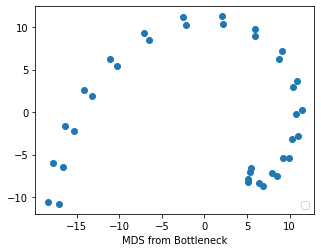

In [55]:
mds = manifold.MDS(n_components=2, max_iter=5000, eps=1e-12,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(B).embedding_

plt.figure(figsize=(5,5))
#labels = [int(pd["shape_class"]) for pd in PDs.values() if(pd["noise"]=="n05" and pd["dimension"]=="1.txt")]
#for i in range(0,3):
#    plt.scatter(pos[i*n_iter:(i+1)*n_iter,0], pos[i*n_iter:(i+1)*n_iter, 1], label="{} features".format(i+1))
    #plt.scatter(pos[i*n_iter:(i+1)*n_iter,0], [0]*5 , label="{} features".format(i+1))
plt.scatter(pos[:,0],pos[:,1])#, c=labels)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc="lower right")
plt.xlabel("MDS from Bottleneck")
plt.show()